# Chapter 1. Band pass filter

Ildar Rakhmatulin ildarr2016@gmail.com

## Import libraries
To install libraries in Python, you can use a package manager like pip, which comes pre-installed with most Python distributions.



In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
from scipy import signal

## Import Dataset

Load dataset
https://github.com/Ildaron/ironbci  
The following dataset structure is used  


ch1	ch2	ch3	ch4	ch5	ch6	ch7	ch8  
..    ..    ..  ..  ..  ..  ..  ..    
..    ..    ..  ..  ..  ..  ..  ..  

          ch1     ch2      ch3      ch4      ch5     ch6      ch7      ch8
0     23899.1  2951.1  36442.2  38418.6  12414.9  3759.5  31001.4  52775.3
1     23917.7  3048.0  36463.8  38344.3  12448.1  3726.3  31032.4  52223.4
2     23984.9  3148.2  36525.1  39002.6  12520.4  3601.3  31103.2  53175.1
3     24016.8  3183.3  36551.5  39602.8  12548.5  3473.0  31133.2  54514.6
4     23960.3  3061.0  36494.8  39256.9  12475.6  3549.7  31061.9  54321.3
...       ...     ...      ...      ...      ...     ...      ...      ...
7115  23896.6  3893.1  37567.5  38276.6  11183.1  4515.5  31611.9  48532.8
7116  23850.2  3780.5  37514.3  38075.4  11119.7  4572.2  31551.9  48566.2
7117  23766.2  3644.2  37432.3  37477.1  11029.8  4755.0  31464.2  47165.5
7118  23768.4  3709.8  37443.6  37362.9  11048.4  4738.0  31481.5  46410.0
7119  23841.3  3830.5  37514.9  37800.0  11130.5  4623.2  31560.6  47139.6

[7120 rows x 8 columns]


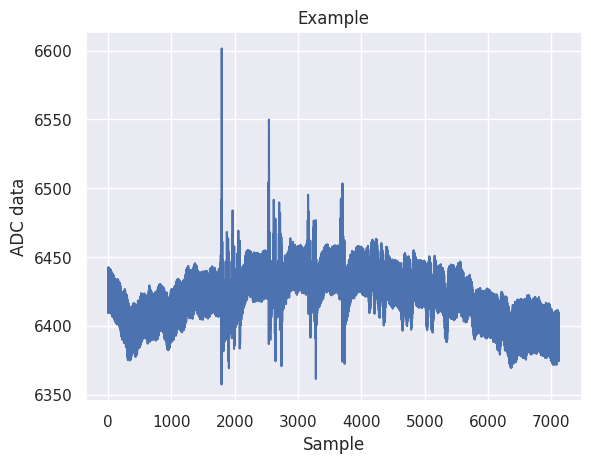

In [ ]:
#len_data = 1169
#value_data = 27

dataset_y_row = pd.read_excel("https://github.com/rklymentiev/EEG_course/raw/master/dataset/dataset.xlsx")
print(dataset_y_row)
dataset_y = dataset_y_row.transpose()

channel = 0
dataset_one_ch = dataset_y.iloc[channel]
dataset_one_ch = round(1000000*4.5*(dataset_one_ch/16777215),2)

plt.plot(dataset_one_ch)
plt.title("Example")
plt.ylabel('ADC data')
plt.xlabel('Sample')
plt.show()

## Signal proccessing
Signal processing for EEG (Electroencephalography) data involves a range of techniques used to analyze and extract meaningful information from the electrical signals recorded from the brain. EEG signals are complex and often contaminated with noise, artifacts, and other unwanted components. Signal processing methods are essential for enhancing the signal quality, identifying patterns, and understanding brain activity.

## Band Pass Filter
Band-pass filtering is a common signal processing technique used in EEG (Electroencephalography) data analysis to isolate specific frequency bands of interest while removing unwanted frequencies. Band-pass filtering allows researchers to focus on particular brainwave rhythms that are relevant to their study. For example, you might want to extract the alpha, beta, or gamma waves from the EEG data.  


**Positive**  
*   Frequency Analysis: EEG signals exhibit various frequency components (e.g., alpha, beta, delta, theta waves), each associated with different cognitive processes. A band-pass filter isolates these components, aiding frequency-specific analysis.

* Event-Related Potentials (ERPs): When studying ERPs or specific neural responses to stimuli, a band-pass filter can highlight the frequency ranges relevant to the event.

* Artifact Removal: Band-pass filters can reduce certain types of artifacts, such as low-frequency drifts or high-frequency noise, by focusing on the desired frequency range.

* Functional Connectivity: Applying consistent band-pass filtering across channels can help enhance functional connectivity analysis by removing frequencies unrelated to the neural network under investigation.

* Removing Baseline Drift: For EEG recordings, slow baseline drifts can obscure meaningful activity. Band-pass filters with cutoffs around the drift frequency can help minimize this effect.

**Negative**

*  While band-pass filters can be valuable for EEG data analysis, they can also be problematic when used inappropriately or excessively. Here are some scenarios where a band-pass filter might not be suitable for EEG processing:

* Overfiltering. Applying overly narrow band-pass filters can lead to signal distortion and the removal of genuine neural activity. Aggressive filtering might result in the loss of important frequency components.

* Misaligned Cutoff Frequencies. Setting incorrect low-pass and high-pass cutoff frequencies can result in unintended filtering of important neural oscillations or event-related potentials.

* Baseline Drift Removal. Relying solely on a band-pass filter to remove baseline drift can inadvertently remove relevant low-frequency neural signals along with the drift.

* Lack of Understanding. If you lack a clear understanding of the frequency characteristics of EEG signals and the implications of filtering, you might misuse band-pass filters and draw incorrect conclusions from your analysis.

* Data Artifacts. Band-pass filtering might not effectively remove certain types of artifacts, such as muscle artifacts or eye blinks, requiring additional preprocessing steps.

* Uneven Spectral Distribution. EEG signals often have uneven spectral distributions, and applying a uniform band-pass filter might not accurately capture the underlying neural activity.

* Inconsistent Filtering. If you apply different band-pass filters to different data segments or channels without justification, it can lead to inconsistencies in your analysis.

**How it works**   
A band-pass filter for EEG works by selectively allowing a specific range of frequencies within the EEG signal to pass through while diminishing frequencies outside that range. This is achieved through a filter design that boosts the desired frequencies and reduces amplitudes of unwanted frequencies, helping highlight neural activity in the chosen frequency band for focused analysis.

Here we use **Butterworth filters** via Signal library.   
signal.butter is a function provided by the scipy.signal module in Python. It is used to design digital Butterworth filters, which are a type of infinite impulse response (IIR) filter commonly used for signal processing tasks, including filtering EEG signals. The Butterworth filter is characterized by having a flat frequency response in its passband and a gradual roll-off in its stopband.  


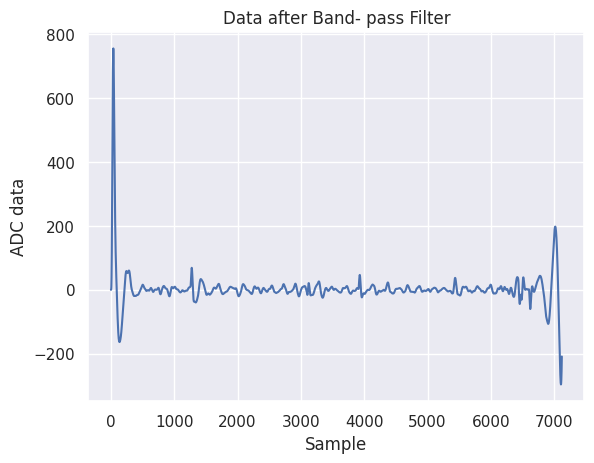

In [ ]:
data_after_band_pass_filter = dataset_y

def butter_highpass(cutoff, fs, order=3):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a
def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff_high, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y
def butter_lowpass(cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
def butter_lowpass_filter(data, cutoff, fs, order=4):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y

fps = 250
cutoff_high=1
cutoff_low=5
x=[]
for a in range(0,8,1):
    filtered_sine_high = butter_highpass_filter(dataset_y.iloc[a], cutoff_high, fps)
    filtered_high_pass= butter_lowpass_filter(filtered_sine_high, cutoff_low, fps)
    data_after_band_pass_filter.iloc[a] = filtered_high_pass
    test = filtered_high_pass

plt.plot(filtered_high_pass)
plt.title("Data after Band- pass Filter")
plt.ylabel('ADC data')
plt.xlabel('Sample')
plt.show()